# Introduction to Convolution Neural Networks

## Import the libraries

In [1]:
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

import matplotlib.pyplot as plt
%matplotlib inline

## Load the data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Pre-processing
Our MNIST images only have a depth of 1, but we must explicitly declare that

In [4]:
num_classes = 10
epochs = 3

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test, num_classes)

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


## Create and compile the model.

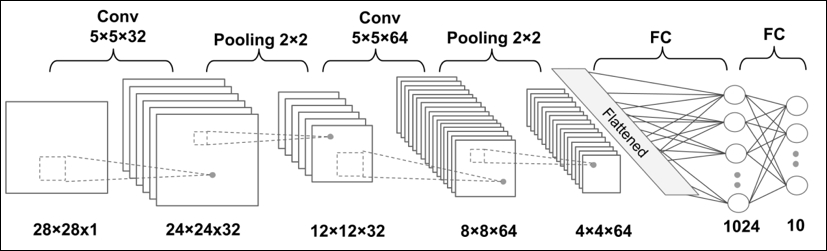

In [6]:
cnn = Sequential()

In [7]:
cnn.add(Conv2D(32, kernel_size=(5,5), input_shape=(28,28,1), padding='same', activation='relu'))

In [8]:
cnn.add(MaxPooling2D())

In [9]:
cnn.add(Conv2D(64, kernel_size=(5,5), padding='same', activation='relu'))

In [10]:
cnn.add(MaxPooling2D())

In [11]:
cnn.add(Flatten())

In [12]:
cnn.add(Dense(1024, activation='relu'))

In [16]:
cnn.add(Dense(10,activation='softmax'))
#10 bin grouping -> softmax

In [14]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
print(cnn.summary())
#maxpooling and flatten have zero parameters bc it computes a fixed func of input

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              3212288   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

## Train the model

In [35]:
history = cnn.fit(X_train,y_train,epochs=5,verbose=1,validation_data=(X_train,y_train))

Epoch 1/5
1875/1875 [==============================] - 91s 49ms/step - loss: 0.1005 - accuracy: 0.9919 - val_loss: 0.0735 - val_accuracy: 0.9953
Epoch 2/5
1875/1875 [==============================] - 100s 53ms/step - loss: 0.0720 - accuracy: 0.9934 - val_loss: 0.0559 - val_accuracy: 0.9952
Epoch 3/5
1875/1875 [==============================] - 101s 54ms/step - loss: 0.0535 - accuracy: 0.9942 - val_loss: 0.0395 - val_accuracy: 0.9961
Epoch 4/5
1875/1875 [==============================] - 101s 54ms/step - loss: 0.0416 - accuracy: 0.9951 - val_loss: 0.0352 - val_accuracy: 0.9959
Epoch 5/5
1875/1875 [==============================] - 101s 54ms/step - loss: 0.0319 - accuracy: 0.9960 - val_loss: 0.0326 - val_accuracy: 0.9947


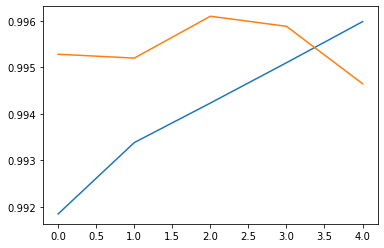

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [39]:
cnn.save_weights('cnn-model-weights.h5')
#method that determines the wait if we have to run cells again
cnn.load_weights('cnn-model-weights.h5')

In [40]:
score = cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0683 - accuracy: 0.9877


In [41]:
score
#list-> it's better than NN model's

[0.06833623349666595, 0.9876999855041504]